### Business Understanding

Extract the more significant features of a listing that help sell the home faster. An Agent can close more transactions if the number of days on Market is less.

What features of a listing drive the number of days the listing stays on market?


### Data Understanding

In contrast to the analysis performed on the listing dataset from the last 10 years, this time, the dataset is sliced to include only the listings in the hot months (April, May, June) to factor out the seasonality and more property features have been included.
The dataset contains around 78k listings from the last 5 years for 3 months of the year and 24 features.
```
Countyname
LivingSqFt
WalkScore
Subclass
DOM
PostalCode
Age
BedsTotal
BathsFull
SaleYear
PhotoCount
Commission
GarageSpaces
IncorporatedYN
HOAExistYN
FireplaceYN
PoolYN
NewConstructionYN
VirtualTour
openhousehours
openhousect
ElementaryRating
HighSchoolrating
DaysonMarket
ListPrice
```


In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import median_absolute_error, mean_squared_error
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector,RFE
from scipy.special import exp10
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
warnings.simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings('ignore')

In [93]:
# import dataset
df = pd.read_excel('data/listingdataslicedv3.xlsx')


In [95]:
df.head()

,Countyname,LivingSqFt,WalkScore,Subclass,DOM,PostalCode,Age,BedsTotal,BathsFull,SaleYear,...,PoolYN,NewConstructionYN,VirtualTour,openhousehours,openhousect,ElementaryRating,HighSchoolrating,DaysonMarket,Countyid,ListPrice
0,Monterey,5654.0,17.0,101,1577,93953,31.0,5,5,2013,...,1.0,NaN,1,0,0,10,10,1577,27,2050000
1,Santa Clara,1088.0,65.0,101,1313,95127,62.0,2,1,2013,...,0.0,NaN,0,0,0,0,0,1231,43,385000
2,Monterey,0.0,0.0,101,737,93924,27.0,1,1,2012,...,0.0,NaN,0,0,0,7,7,632,27,582000
3,Santa Clara,1092.0,52.0,101,1083,95126,67.0,2,2,2013,...,0.0,NaN,0,0,0,4,4,1083,43,599999
4,Monterey,2000.0,38.0,101,663,93926,16.0,4,3,2012,...,0.0,NaN,0,0,0,0,0,505,27,225000


## Exploratory Data Analysis (EDA)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78135 entries, 0 to 78134
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Countyname         78135 non-null  object 
 1   LivingSqFt         78134 non-null  float64
 2   WalkScore          77742 non-null  float64
 3   Subclass           78135 non-null  int64  
 4   DOM                78135 non-null  int64  
 5   PostalCode         78135 non-null  int64  
 6   Age                78019 non-null  float64
 7   BedsTotal          78135 non-null  int64  
 8   BathsFull          78135 non-null  int64  
 9   SaleYear           78135 non-null  int64  
 10  PhotoCount         78099 non-null  float64
 11  Commission         78135 non-null  float64
 12  GarageSpaces       74072 non-null  float64
 13  IncorporatedYN     43354 non-null  float64
 14  HOAExistYN         78135 non-null  int64  
 15  FireplaceYN        63271 non-null  float64
 16  PoolYN             681

Text(0, 0.5, 'null count')

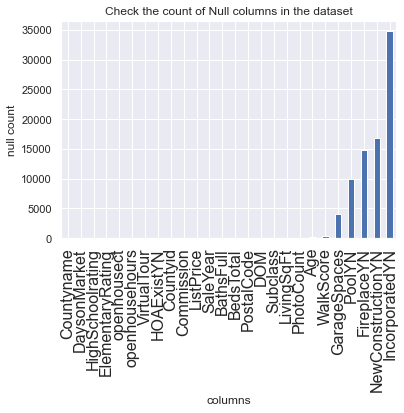

In [97]:
df.isnull().sum()
nullplot=df.isnull().sum().sort_values().plot(kind = 'bar',title="Check the count of Null columns in the dataset")
nullplot.set_xlabel("columns")
nullplot.set_ylabel("null count")

Text(0, 0.5, 'SaleRate')

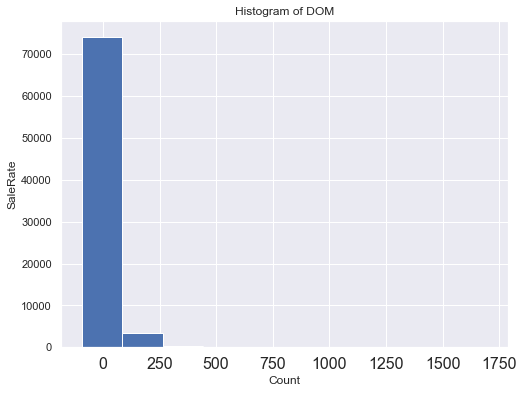

In [98]:
plt.figure(figsize=(8,6))
df["DOM"].hist()

plt.title('Histogram of DOM')
plt.xlabel('Count')
plt.ylabel('SaleRate')

Skewness: 0.731109


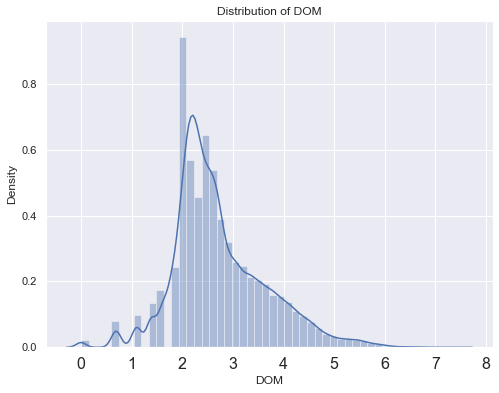

In [99]:
plt.figure(figsize=(8,6))
sns.distplot(np.log1p(df["DOM"]))

plt.title('Distribution of DOM')
print("Skewness: %f" % np.log1p(df["DOM"]).skew())

Skewness: -1.835848


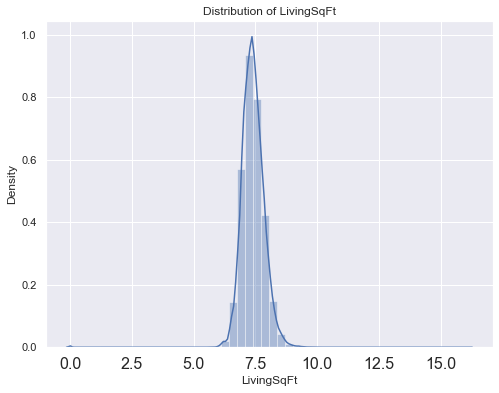

In [100]:
plt.figure(figsize=(8,6))
sns.distplot(np.log1p(df["LivingSqFt"]))

plt.title('Distribution of LivingSqFt')
print("Skewness: %f" % np.log1p(df["LivingSqFt"]).skew())

Skewness: 0.351550


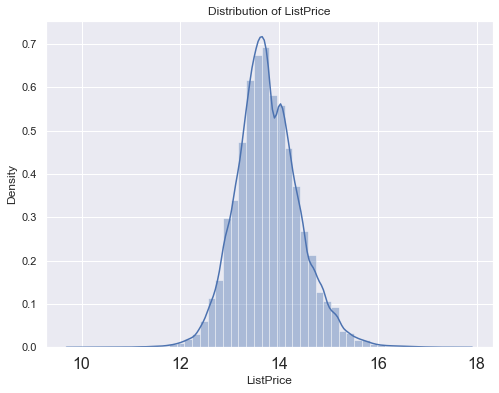

In [104]:
plt.figure(figsize=(8,6))
sns.distplot(np.log1p(df["ListPrice"]))

plt.title('Distribution of ListPrice')
print("Skewness: %f" % np.log1p(df["ListPrice"]).skew())

<AxesSubplot:title={'center':'SaleRate in various SubClasses of Property'}, xlabel='Subclass', ylabel='DOM'>

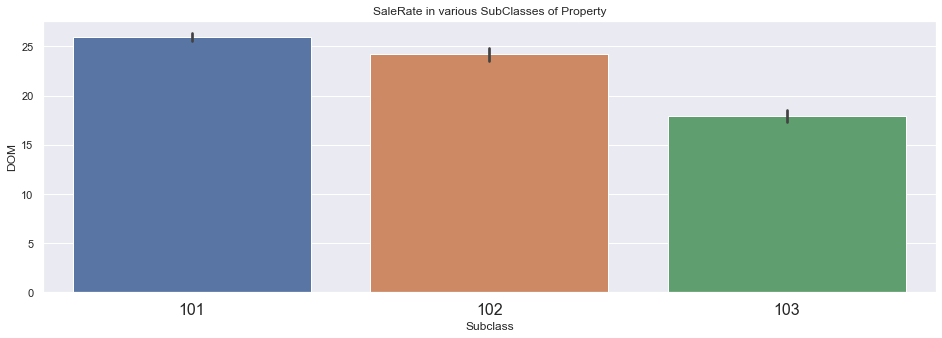

In [105]:
plt.figure(figsize=(16,5))
plt.title('SaleRate in various SubClasses of Property')

sns.set(rc={'axes.grid': True,'xtick.labelsize':16})
sns.barplot(df['Subclass'],df['DOM'])

<AxesSubplot:title={'center':'Sales by County'}, xlabel='Countyname', ylabel='DOM'>

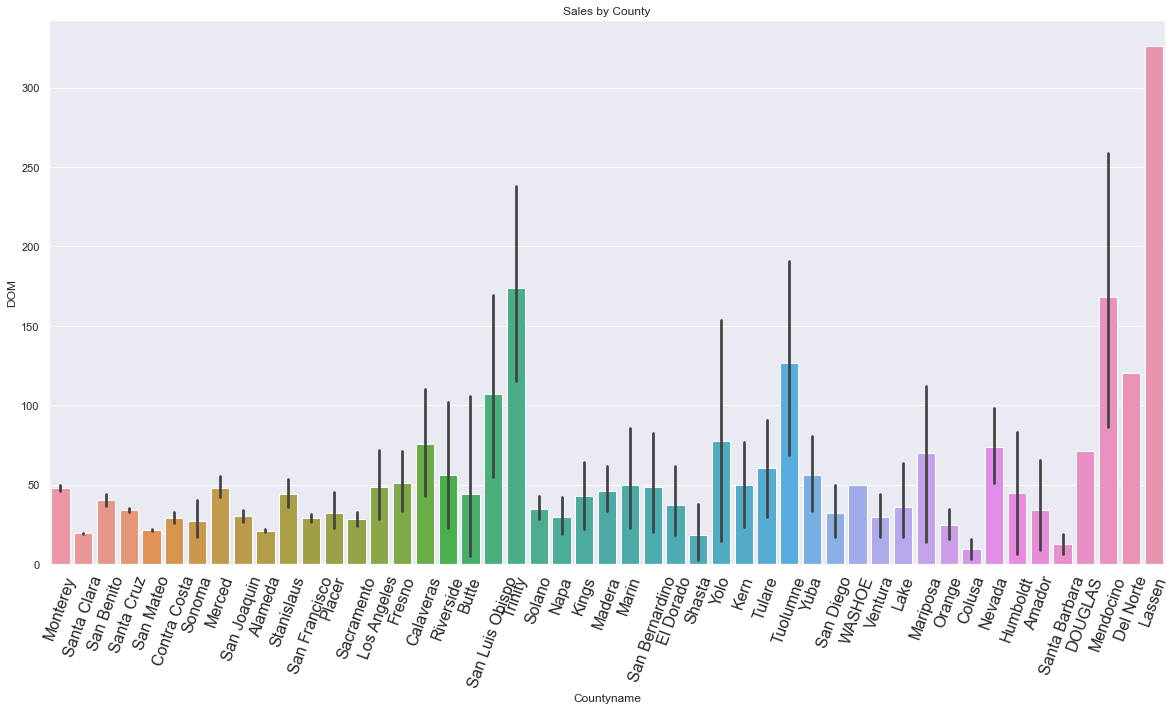

In [106]:
plt.figure(figsize=(20,10))
plt.title('Sales by County')
plt.xticks(rotation=70)
sns.set(rc={'axes.grid': True,'xtick.labelsize':16})
sns.barplot(df['Countyname'],df["DOM"])

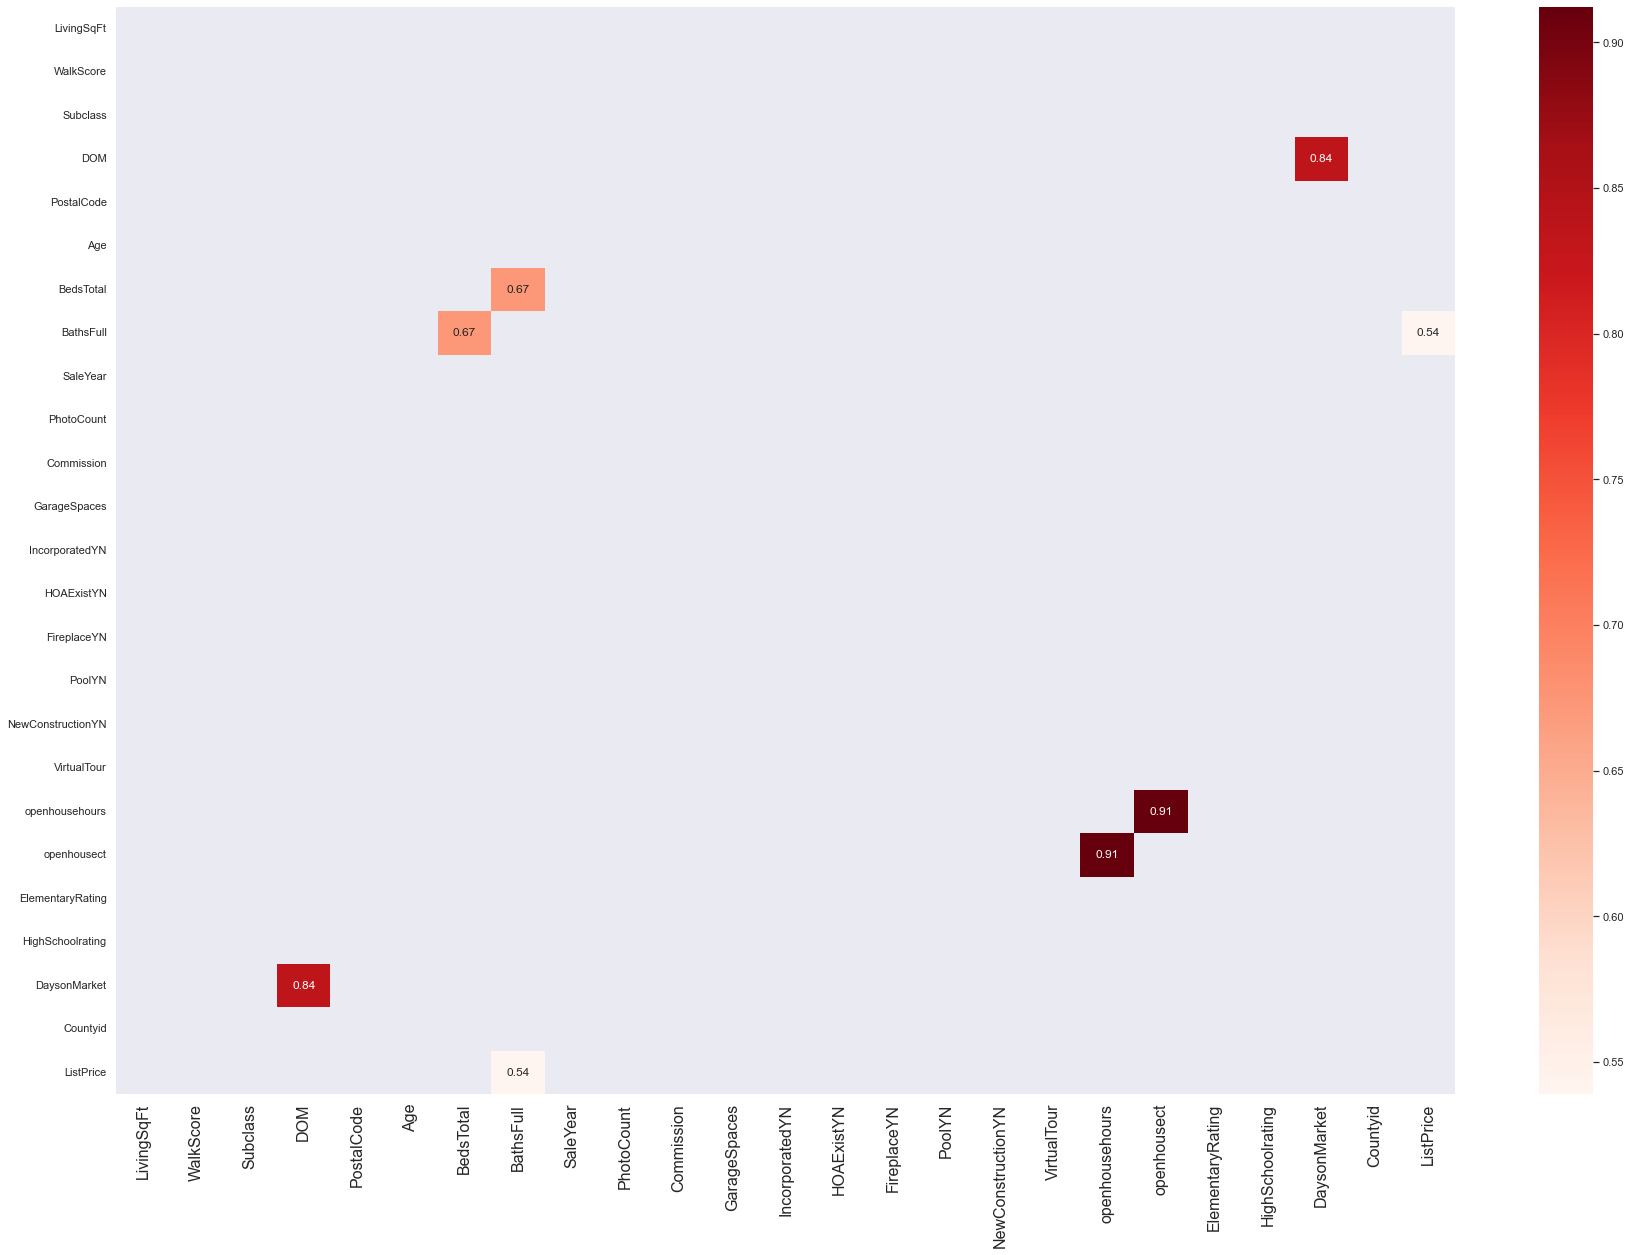

In [107]:
# create correlation matrix with abs values
corr_matrix = df.corr().abs()
threshold = 0.5
filtered_corr_df = corr_matrix[(corr_matrix >= threshold) & (corr_matrix != 1.000)] 
plt.figure(figsize=(30,20))
sns.heatmap(filtered_corr_df, annot=True, cmap="Reds")
plt.show()

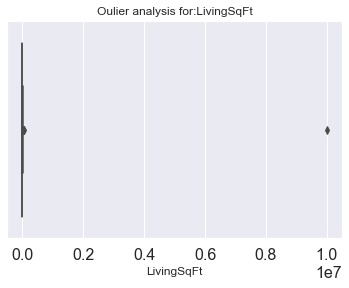

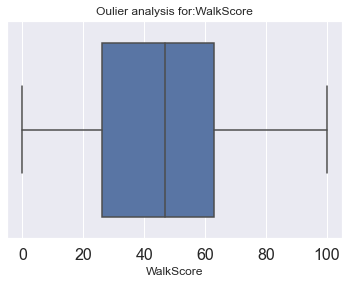

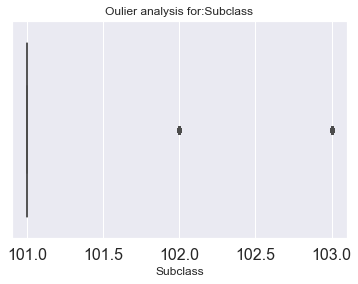

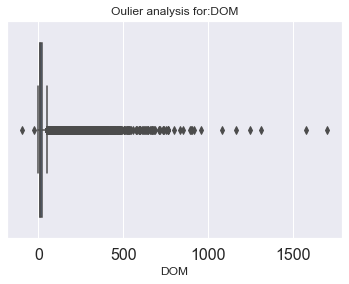

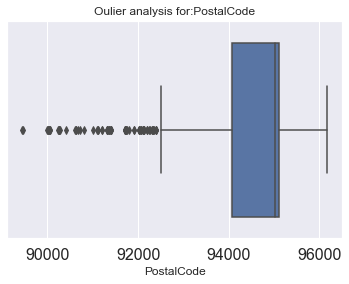

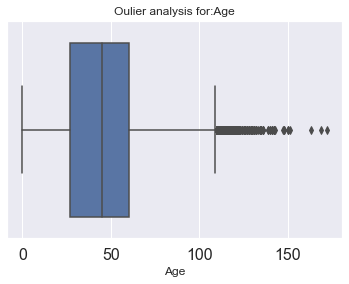

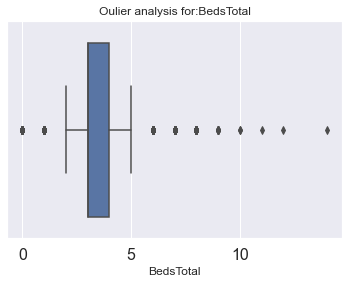

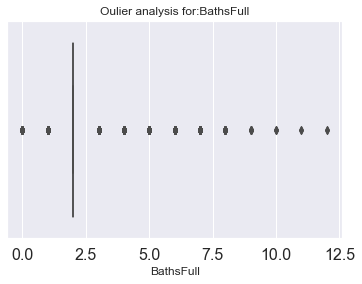

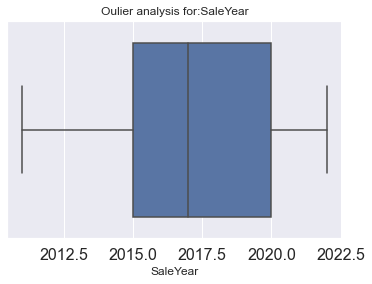

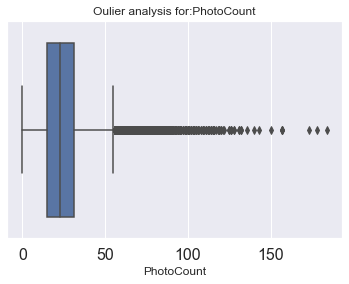

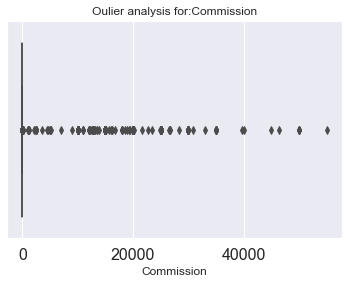

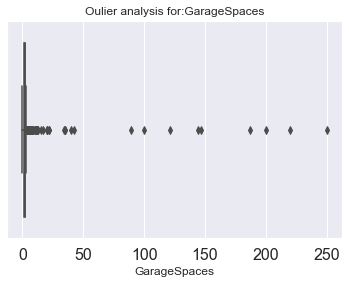

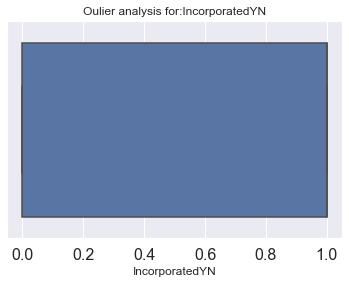

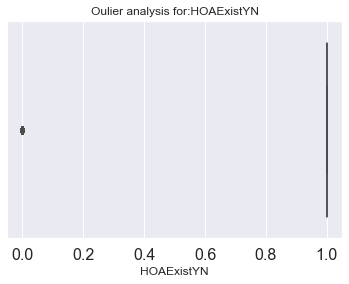

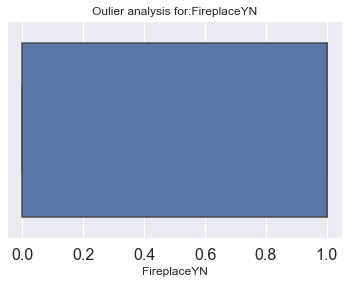

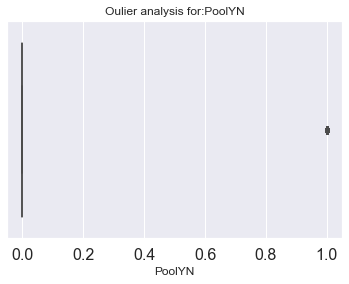

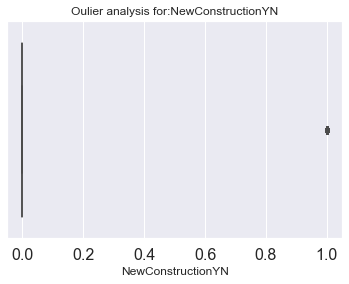

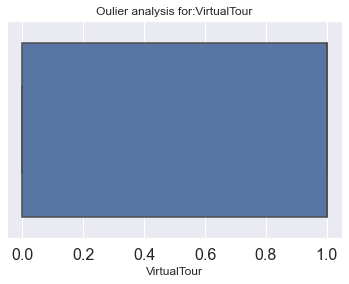

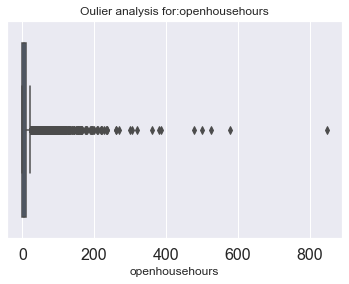

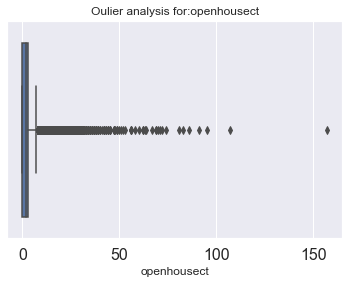

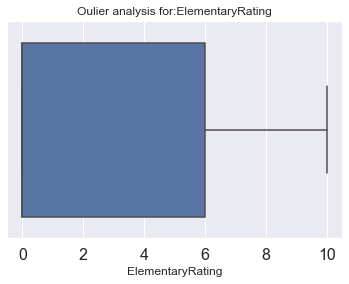

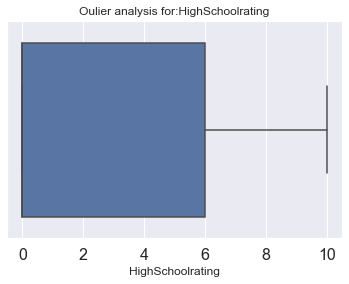

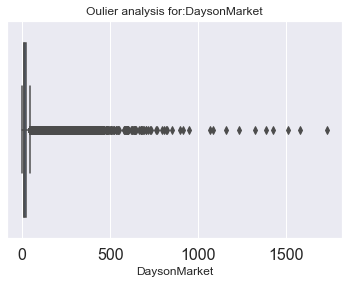

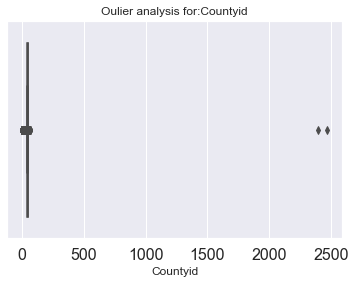

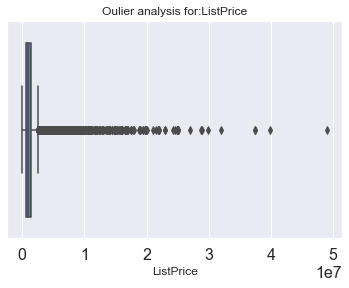

In [108]:
integer_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()
integer_columns

for i in integer_columns:
    plt.figure()
    sns.boxplot(x=df[i])
    plt.title('Oulier analysis for:'+i)

## EDA Findings

The initial datset contains a significant number of null values for fields like IncorporatedYN, NewConstructionYN and can be dropped.

The target column DOM and the livingsqft distribution is skewed and can be transformed to achieve normal distribution>

The numerical columns have a lot of outliers and can be removed before modeling.

Heatmap of features does not show any significant correlation.



### Data Preparation

Remove all the outliers based on the plots above

Transform the DOM and livingsqft column using log

Drop closely correlated columns and null valued columns.

In [141]:
df_filtered = df[(df['LivingSqFt']<10000) & (df['BedsTotal']<7) & (df['BathsFull']<5) & (df['PhotoCount']<70) & (df['DOM']<100)]

In [142]:
df_final=df_filtered.drop(['IncorporatedYN','NewConstructionYN','DaysonMarket','SaleYear','Countyid'], axis=1).dropna()
#data_modelling=data_clean.dropna()

In [143]:
df_final['DOM'] = np.log1p(df_final['DOM'])
df_final['LivingSqFt'] = np.log1p(df_final['LivingSqFt'])
df_final['ListPrice'] = np.log1p(df_final['ListPrice'])
df_final=df_final.dropna()

In [144]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53241 entries, 44 to 78130
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Countyname        53241 non-null  object 
 1   LivingSqFt        53241 non-null  float64
 2   WalkScore         53241 non-null  float64
 3   Subclass          53241 non-null  int64  
 4   DOM               53241 non-null  float64
 5   PostalCode        53241 non-null  int64  
 6   Age               53241 non-null  float64
 7   BedsTotal         53241 non-null  int64  
 8   BathsFull         53241 non-null  int64  
 9   PhotoCount        53241 non-null  float64
 10  Commission        53241 non-null  float64
 11  GarageSpaces      53241 non-null  float64
 12  HOAExistYN        53241 non-null  int64  
 13  FireplaceYN       53241 non-null  float64
 14  PoolYN            53241 non-null  float64
 15  VirtualTour       53241 non-null  int64  
 16  openhousehours    53241 non-null  int64

## Modeling

With the final dataset containing around 55k records, split Into the train and test sets with 70:30 ratio.

Use One hot encoding for categorical features and StandardScaler for numerical columns.



In [145]:
X = df_final.drop('DOM', axis = 1)
y = df_final['DOM']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [146]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53241 entries, 44 to 78130
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Countyname        53241 non-null  object 
 1   LivingSqFt        53241 non-null  float64
 2   WalkScore         53241 non-null  float64
 3   Subclass          53241 non-null  int64  
 4   PostalCode        53241 non-null  int64  
 5   Age               53241 non-null  float64
 6   BedsTotal         53241 non-null  int64  
 7   BathsFull         53241 non-null  int64  
 8   PhotoCount        53241 non-null  float64
 9   Commission        53241 non-null  float64
 10  GarageSpaces      53241 non-null  float64
 11  HOAExistYN        53241 non-null  int64  
 12  FireplaceYN       53241 non-null  float64
 13  PoolYN            53241 non-null  float64
 14  VirtualTour       53241 non-null  int64  
 15  openhousehours    53241 non-null  int64  
 16  openhousect       53241 non-null  int64

In [147]:
baseline_train = np.ones(shape = y_train.shape)*y_train.mean()
baseline_test = np.ones(shape = y_test.shape)*y_test.mean()
mse_baseline_train = median_absolute_error(baseline_train, y_train)
mse_baseline_test = median_absolute_error(baseline_test, y_test)
print(mse_baseline_train,mse_baseline_test)

0.5388875236402964 0.5344149047817721


In [148]:
  ohe_cols=['Countyname']
num_cols=[ 'LivingSqFt','WalkScore','Subclass','PostalCode','Age','BedsTotal','BathsFull','PhotoCount','Commission',  
 'GarageSpaces',
  'HOAExistYN' ,       
   'FireplaceYN' ,    
   'PoolYN' ,   
   'VirtualTour'  ,    
   'openhousehours',   
   'openhousect' ,      
   'ElementaryRating',  
   'HighSchoolrating'   
]

ordinal_ohe_transformer = make_column_transformer(
      (OneHotEncoder(handle_unknown='ignore'), ohe_cols),   

    (StandardScaler(), num_cols),                          
                                          remainder='passthrough')

In [149]:
mresult=[]
pipe1 = Pipeline([('transformer', ordinal_ohe_transformer), ('ridgereg', Ridge())])
pipe1.fit(X_train, y_train)
    #fit on train
p1 = pipe1.predict(X_train)
p2 = pipe1.predict(X_test)
print(f'Train MAE: {median_absolute_error(y_train, p1)}')
print(f'Test MAE: {median_absolute_error(y_test, p2)}')
print(f'Accuracy Score: {pipe1.score(X_test,y_test)}')
mresult.append(['Ridge', median_absolute_error(y_train, p1),median_absolute_error(y_test, p2),pipe1.score(X_test,y_test)])

Train MAE: 0.365389691962402
Test MAE: 0.358587369363105
Accuracy Score: 0.23291909012844603


In [150]:
pipe2 = make_pipeline(ordinal_ohe_transformer, TransformedTargetRegressor( regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)))
pipe2.fit(X_train, y_train)
    #fit on train
p1 = pipe2.predict(X_train)
p2 = pipe2.predict(X_test)
print(f'Train MAE: {median_absolute_error(y_train, p1)}')
print(f'Test MAE: {median_absolute_error(y_test, p2)}')
print(f'Accuracy Score: {pipe2.score(X_test,y_test)}')
mresult.append(['TTR_RandomForest', median_absolute_error(y_train, p1),median_absolute_error(y_test, p2),pipe2.score(X_test,y_test)])

Train MAE: 0.12385328277068353
Test MAE: 0.32778154461843156
Accuracy Score: 0.2792526728967947


In [151]:
df_final=df_filtered.drop(['IncorporatedYN','NewConstructionYN','DaysonMarket','Countyname','SaleYear'], axis=1).dropna()
#data_modelling=data_clean.dropna()
df_final['DOM'] = np.log1p(df_final['DOM'])
df_final['LivingSqFt'] = np.log1p(df_final['LivingSqFt'])
df_final['ListPrice'] = np.log1p(df_final['ListPrice'])
df_final=df_final.dropna()

In [152]:
X = df_final.drop('DOM', axis = 1)
y = df_final['DOM']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model Improvement using Polynomial features

In [154]:
pipe3 = Pipeline([('polyfeatures', PolynomialFeatures(degree = 2, include_bias = False)),('transformer', StandardScaler()), ('rfr', RandomForestRegressor())])
pipe3.fit(X_train, y_train)
p1 = pipe3.predict(X_train)
p2 = pipe3.predict(X_test)
print(f'Train MAE: {median_absolute_error(y_train, p1)}')
print(f'Test MAE: {median_absolute_error(y_test, p2)}')
print(f'Accuracy Score: {pipe3.score(X_test,y_test)}')
mresult.append(['Polynomial_RandomForestReg', median_absolute_error(y_train, p1),median_absolute_error(y_test, p2),pipe3.score(X_test,y_test)])

Train MAE: 0.1218001168363052
Test MAE: 0.3238736779607283
Accuracy Score: 0.2891788977307279


In [155]:
default_scaled=StandardScaler().fit(df_final).transform(df_final)
pca_20=PCA(n_components=20,random_state=2020)
pca_20.fit(default_scaled)
default_pca_20=pca_20.transform(default_scaled)
default_pca_20

array([[-10.90858375,   2.19680658,   2.03773313, ...,   4.35169724,
         12.86992109,   0.47070333],
       [ -9.25977877,   1.35612731,   0.64372967, ...,   5.68266768,
         13.93026036,   0.3839795 ],
       [ -9.94250811,   1.6670635 ,   1.74967565, ...,   5.09289002,
         13.32098333,   0.36598191],
       ...,
       [  0.41470088,  -1.40170098,  -1.10603122, ...,  -0.21075902,
         -0.06098771,  -0.07879393],
       [ -0.10580244,   0.05482041,  -1.250901  , ...,   0.0315227 ,
         -0.38587935,   1.16595145],
       [  0.26358225,  -0.63573792,   1.7841018 , ...,   0.19332208,
         -0.23811248,   0.1089917 ]])

In [156]:
np.cumsum(pca_20.explained_variance_ratio_*100)

array([ 18.62069178,  28.74390184,  37.9233425 ,  45.99976474,
        52.2187583 ,  57.70140448,  62.61508013,  67.36447815,
        71.87595995,  76.20527743,  80.34782736,  83.98693724,
        87.40815052,  90.53535396,  93.58349743,  95.61423376,
        97.26452228,  98.64700728,  99.53291537, 100.        ])

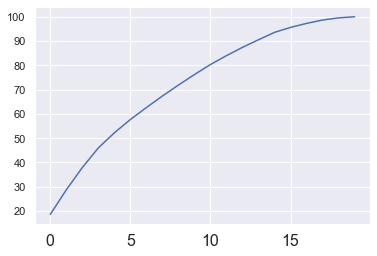

In [157]:
plt.plot(np.cumsum(pca_20.explained_variance_ratio_*100))
plt.savefig("elbow.png",dpi=100)

In [158]:
np.cumsum(pca_20.explained_variance_ratio_*100)[9]

76.20527743426379

In [160]:
scoring = ['r2']
r_multi = permutation_importance(
    pipe3, X_test, y_test, n_repeats=30, random_state=0, scoring=scoring)

for metric in r_multi:
    print(f"{metric}")
    r = r_multi[metric]
    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"    {X_test.columns[i]:<8}"
                  f"  {r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")

r2
    openhousect  0.499 +/- 0.007
    ListPrice  0.048 +/- 0.002
    openhousehours  0.041 +/- 0.002
    LivingSqFt  0.019 +/- 0.002
    PhotoCount  0.014 +/- 0.002
    WalkScore  0.012 +/- 0.002
    Countyid  0.010 +/- 0.001
    Age       0.007 +/- 0.001
    PostalCode  0.005 +/- 0.001
    Commission  0.005 +/- 0.001
    VirtualTour  0.004 +/- 0.001
    FireplaceYN  0.004 +/- 0.001
    BathsFull  0.003 +/- 0.001
    GarageSpaces  0.002 +/- 0.001
    ElementaryRating  0.001 +/- 0.000


In [161]:
df_final_pca=df_final.drop(['openhousehours','HighSchoolrating','ElementaryRating','GarageSpaces','Commission','HOAExistYN','Subclass','PostalCode','BathsFull','PoolYN'], axis=1).dropna()

In [162]:
df_final_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53241 entries, 44 to 78130
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LivingSqFt   53241 non-null  float64
 1   WalkScore    53241 non-null  float64
 2   DOM          53241 non-null  float64
 3   Age          53241 non-null  float64
 4   BedsTotal    53241 non-null  int64  
 5   PhotoCount   53241 non-null  float64
 6   FireplaceYN  53241 non-null  float64
 7   VirtualTour  53241 non-null  int64  
 8   openhousect  53241 non-null  int64  
 9   Countyid     53241 non-null  int64  
 10  ListPrice    53241 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 4.9 MB


In [163]:
X = df_final_pca.drop('DOM', axis = 1)
y = df_final_pca['DOM']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [164]:
pipe4 = Pipeline([('polyfeatures', PolynomialFeatures(degree = 2, include_bias = False)),('transformer', StandardScaler()), ('linreg', RandomForestRegressor())])
pipe4.fit(X_train, y_train)
p1 = pipe4.predict(X_train)
p2 = pipe4.predict(X_test)
print(f'Train MAE: {median_absolute_error(y_train, p1)}')
print(f'Test MAE: {median_absolute_error(y_test, p2)}')
print(f'Accuracy Score: {pipe4.score(X_test,y_test)}')
mresult.append(['PCA_Polynomial_RandomForestReg', median_absolute_error(y_train, p1),median_absolute_error(y_test, p2),pipe4.score(X_test,y_test)])

Train MAE: 0.06220929353805586
Test MAE: 0.4321971441782153
Accuracy Score: 0.2744584993538096


### Ensemble Modeling using Voting Regressor and GradientBoostingRegressor

In [177]:
voter = VotingRegressor([ ('lgr', TransformedTargetRegressor()), ('knn', KNeighborsRegressor()),('dtr',DecisionTreeRegressor()),
                         ('rid',Ridge()),('svr',SVR()) ])

voterpipe=  Pipeline([ ('transformer',StandardScaler()),('clf',voter) ])
voterpipe.fit(X_train, y_train)
p1 = voterpipe.predict(X_train)
p2 = voterpipe.predict(X_test)
print(f'Accuracy Score: {voterpipe.score(X_test,y_test)}')
mresult.append(['VotingRegressor', median_absolute_error(y_train, p1),median_absolute_error(y_test, p2),voterpipe.score(X_test,y_test)])

Accuracy Score: 0.251372216461036


In [180]:
gbpipe=  Pipeline([ ('transformer',StandardScaler()),('clf',GradientBoostingRegressor()) ])
gbpipe.fit(X_train, y_train)
p1 = gbpipe.predict(X_train)
p2 = gbpipe.predict(X_test)
print(f'Accuracy Score: {gbpipe.score(X_test,y_test)}')
mresult.append(['GradientBoostingRegressor', median_absolute_error(y_train, p1),median_absolute_error(y_test, p2),gbpipe.score(X_test,y_test)])

Accuracy Score: 0.29536701305084656


In [181]:
rtable = pd.DataFrame(mresult, columns = ['Model', 'Train MAE', 'Test MAE', 'Score'])
rtable = rtable.set_index('Model')
rtable

,Train MAE,Test MAE,Score
Model,,,
Ridge,0.365390,0.358587,0.232919
TTR_RandomForest,0.123853,0.327782,0.279253
Polynomial_RandomForestReg,0.121800,0.323874,0.289179
PCA_Polynomial_RandomForestReg,0.124495,0.331247,0.274458
VotingRegressor,0.254042,0.336802,0.251372
GradientBoostingRegressor,0.323415,0.321371,0.295367


## Findings

The features in the given dataset are not very correlated, so to achieve a good model score, polynomial features were used.

The best accuracy is achieved by the model using GradientBoostingRegressor with selected features, although it not very optimal.

The improved model with Principal Component Analysis and Voting Regressor did not yield a good score either.

The results indicate missing data or the need to include more correlated features.

Given the set of features and permutation importance, the number of openhouses for a listing is the most significant feature, followed by ListPrice, Living sqft, and number of photos for  a listing. 



## Next Steps

Use GridSearchCV to find the best parameters for various regression models to improve the accuracy.

Following the CRISP-DM framework, go back to the data collection process and collect more relevant features.

Narrow the dataset further to include fewer Geo locations and only recent couple of years worth of data in order to exclude the effect of pandemic.

Include external datasets to factor in economical conditions like interest rates, recession, and inflation.

Collect data indicating the number of times list was shared on social media, marketing, staging budgets, number of leads generated, team vs individual representation of Buying/Selling Agents.